# **Linear Regression**
---
 
- Copyright (c) Antoine Jacquier (QuantLearn Ltd), 2022. All rights reserved

- Author: Antoine Jacquier <Jack.QuantLearn@gmail.com>

- Platform: Tested on Windows 10 with Python 3.9

In [1]:
import numpy as np
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import random
import yfinance as yf
import statsmodels.api as sm

#### List of tickers

In [2]:
tickers = ['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AMD', 'AAP', 'AES', 'AET', 'AMG', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALXN', 'ALGN', 'ALLE', 'AGN', 'ADS', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'APC', 'ADI', 'ANDV', 'ANSS', 'ANTM', 'AON', 'AOS', 'APA', 'AIV', 'AAPL', 'AMAT', 'APTV', 'ADM', 'ARNC', 'AJG', 'AIZ', 'T', 'ADSK', 'ADP', 'AZO', 'AVB', 'AVY', 'BHGE', 'BLL', 'BAC', 'BK', 'BAX', 'BBT', 'BDX', 'BRK.B', 'BBY', 'BIIB', 'BLK', 'HRB', 'BA', 'BWA', 'BXP', 'BSX', 'BHF', 'BMY', 'AVGO', 'BF.B', 'CHRW', 'CA', 'COG', 'CDNS', 'CPB', 'COF', 'CAH', 'CBOE', 'KMX', 'CCL', 'CAT', 'CBG', 'CBS', 'CELG', 'CNC', 'CNP', 'CTL', 'CERN', 'CF', 'SCHW', 'CHTR', 'CHK', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'XEC', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CTXS', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'CXO', 'COP', 'ED', 'STZ', 'COO', 'GLW', 'COST', 'COTY', 'CCI', 'CSRA', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DLR', 'DFS', 'DISCA', 'DISCK', 'DISH', 'DG', 'DLTR', 'D', 'DOV', 'DWDP', 'DPS', 'DTE', 'DRE', 'DUK', 'DXC', 'ETFC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'EMR', 'ETR', 'EVHC', 'EOG', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ES', 'RE', 'EXC', 'EXPE', 'EXPD', 'ESRX', 'EXR', 'XOM', 'FFIV', 'FB', 'FAST', 'FRT', 'FDX', 'FIS', 'FITB', 'FE', 'FISV', 'FLIR', 'FLS', 'FLR', 'FMC', 'FL', 'F', 'FTV', 'FBHS', 'BEN', 'FCX', 'GPS', 'GRMN', 'IT', 'GD', 'GE', 'GGP', 'GIS', 'GM', 'GPC', 'GILD', 'GPN', 'GS', 'GT', 'GWW', 'HAL', 'HBI', 'HOG', 'HRS', 'HIG', 'HAS', 'HCA', 'HCP', 'HP', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HPQ', 'HUM', 'HBAN', 'HII', 'IDXX', 'INFO', 'ITW', 'ILMN', 'IR', 'INTC', 'ICE', 'IBM', 'INCY', 'IP', 'IPG', 'IFF', 'INTU', 'ISRG', 'IVZ', 'IQV', 'IRM', 'JEC', 'JBHT', 'SJM', 'JNJ', 'JCI', 'JPM', 'JNPR', 'KSU', 'K', 'KEY', 'KMB', 'KIM', 'KMI', 'KLAC', 'KSS', 'KHC', 'KR', 'LB', 'LLL', 'LH', 'LRCX', 'LEG', 'LEN', 'LUK', 'LLY', 'LNC', 'LKQ', 'LMT', 'L', 'LOW', 'LYB', 'MTB', 'MAC', 'M', 'MRO', 'MPC', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MAT', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'MET', 'MTD', 'MGM', 'KORS', 'MCHP', 'MU', 'MSFT', 'MAA', 'MHK', 'TAP', 'MDLZ', 'MON', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MYL', 'NDAQ', 'NOV', 'NAVI', 'NTAP', 'NFLX', 'NWL', 'NFX', 'NEM', 'NWSA', 'NWS', 'NEE', 'NLSN', 'NKE', 'NI', 'NBL', 'JWN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'ORLY', 'OXY', 'OMC', 'OKE', 'ORCL', 'PCAR', 'PKG', 'PH', 'PDCO', 'PAYX', 'PYPL', 'PNR', 'PBCT', 'PEP', 'PKI', 'PRGO', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'RL', 'PPG', 'PPL', 'PX', 'PCLN', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PSA', 'PHM', 'PVH', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RRC', 'RJF', 'RTN', 'O', 'RHT', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'COL', 'ROP', 'ROST', 'RCL', 'CRM', 'SBAC', 'SCG', 'SLB', 'SNI', 'STX', 'SEE', 'SRE', 'SHW', 'SIG', 'SPG', 'SWKS', 'SLG', 'SNA', 'SO', 'LUV', 'SPGI', 'SWK', 'SBUX', 'STT', 'SRCL', 'SYK', 'STI', 'SYMC', 'SYF', 'SNPS', 'SYY', 'TROW', 'TPR', 'TGT', 'TEL', 'FTI', 'TXN', 'TXT', 'TMO', 'TIF', 'TWX', 'TJX', 'TMK', 'TSS', 'TSCO', 'TDG', 'TRV', 'TRIP', 'FOXA', 'FOX', 'TSN', 'UDR', 'ULTA', 'USB', 'UAA', 'UA', 'UNP', 'UAL', 'UNH', 'UPS', 'URI', 'UTX', 'UHS', 'UNM', 'VFC', 'VLO', 'VAR', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VIAB', 'V', 'VNO', 'VMC', 'WMT', 'WBA', 'DIS', 'WM', 'WAT', 'WEC', 'WFC', 'HCN', 'WDC', 'WU', 'WRK', 'WY', 'WHR', 'WMB', 'WLTW', 'WYN', 'WYNN', 'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS']

In [3]:
data_source = 'yahoo'
start, end = '2016-01-01', '2018-01-01'

ticker = 'SPY'
df = yf.download(ticker,start, end)
df.head()
df = df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
df.columns=[ticker]

nbTickers = len(tickers)
nbExtract = 7 ## Number of tickers to consider
listExtractTickers = [ticker]
listTemp = random.sample(tickers, nbExtract)
for i in range(nbExtract):
    listExtractTickers.append(listTemp[i]) ## select nbExtract out of the whole list
print("List of extracted tickers: ", listExtractTickers)

[*********************100%***********************]  1 of 1 completed
List of extracted tickers:  ['SPY', 'MTD', 'CTL', 'UPS', 'JCI', 'HPQ', 'DG', 'NLSN']


In [4]:
## We construct a DataFrame with the first 5 tickers only
for ticker in listExtractTickers[1:]:
    df0 = yf.download(ticker, start, end)
    df0 = df0.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
    df0.columns=[ticker]
    df = pd.concat([df, df0], axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [5]:
print("Total number of tickers:", nbTickers)
print("Numer of observations:", len(df))
print("Number of tickers selected:", nbExtract)
df.head()

Total number of tickers: 505
Numer of observations: 503
Number of tickers selected: 7


,SPY,MTD,CTL,UPS,JCI,HPQ,DG,NLSN
Date,,,,,,,,
2016-01-04,201.020004,329.339996,25.110001,94.839996,33.287956,11.60,72.410004,45.669998
2016-01-05,201.360001,331.380005,24.990000,95.779999,32.890053,11.71,72.830002,46.400002
2016-01-06,198.820007,324.739990,24.719999,94.419998,32.575916,11.29,72.709999,46.130001
2016-01-07,194.050003,315.730011,24.219999,92.599998,31.748692,10.77,71.839996,45.139999
2016-01-08,191.919998,313.929993,23.969999,91.389999,31.696335,10.58,71.459999,44.330002


Compute the returns

In [6]:
returns = df.pct_change(1)
returns= returns.dropna()
returns.head()

,SPY,MTD,CTL,UPS,JCI,HPQ,DG,NLSN
Date,,,,,,,,
2016-01-05,0.001691,0.006194,-0.004779,0.009911,-0.011953,0.009483,0.005800,0.015984
2016-01-06,-0.012614,-0.020037,-0.010804,-0.014199,-0.009551,-0.035867,-0.001648,-0.005819
2016-01-07,-0.023992,-0.027745,-0.020227,-0.019276,-0.025394,-0.046058,-0.011965,-0.021461
2016-01-08,-0.010977,-0.005701,-0.010322,-0.013067,-0.001649,-0.017642,-0.005289,-0.017944
2016-01-11,0.000990,-0.009779,0.006258,0.002954,0.000330,0.006616,-0.025469,0.014888


### Scatter plot

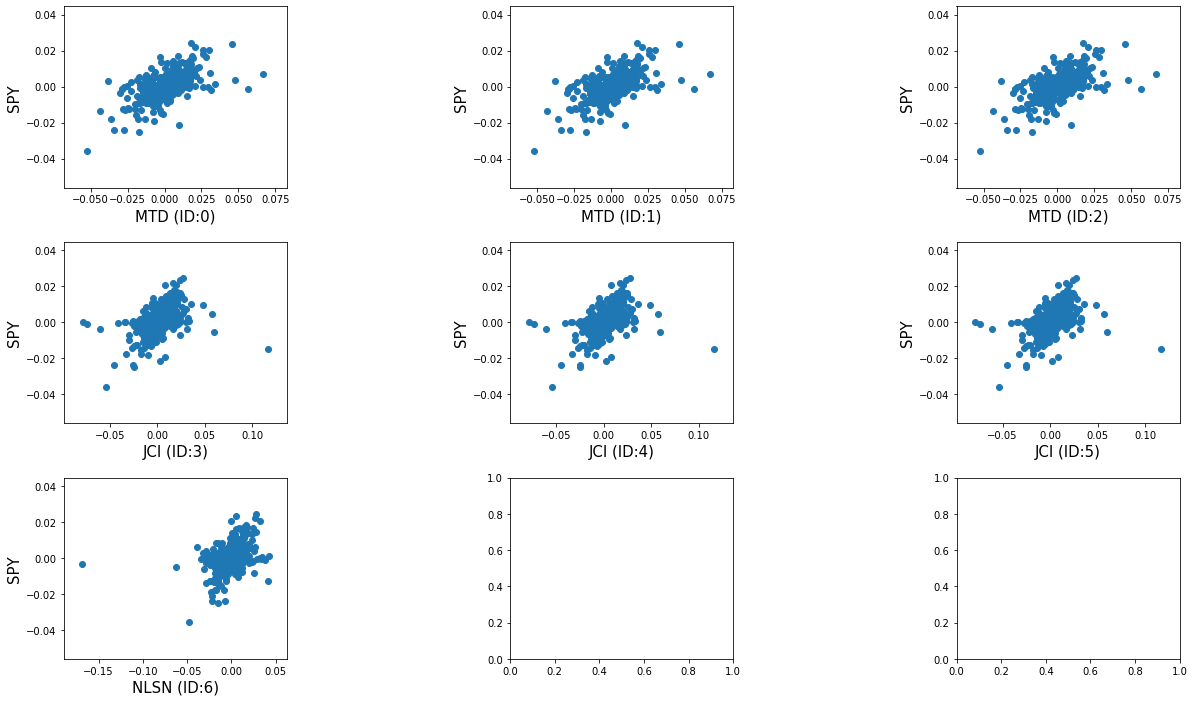

In [7]:
nbCols = 3
nbRows = 1+nbExtract//nbCols
rem = nbExtract%nbCols
fig, axs = plt.subplots(nrows=nbRows, ncols=nbCols, figsize=(20, 4*nbRows))
for i in range(nbRows):
    for j in range(0,nbCols):
        if (nbCols*i+j)<nbExtract:
            plt.subplot(nbRows, nbCols, nbCols*i+j+1)
            idCol = returns.columns[3*i+1]
            plt.scatter(returns[idCol], returns["SPY"])
            plt.ylabel("SPY", size=15)
            plt.xlabel("%s (ID:%i)" %(idCol, nbCols*i+j), size=15)
plt.subplots_adjust(hspace=0.3, wspace=1.)
plt.show()

### Linear regression of SPY against one of the components

#### Choice of the component

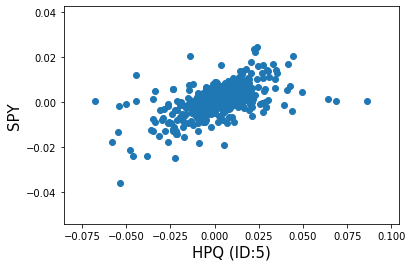

In [8]:
choiceIndex = 5
stockLabel = returns.columns[choiceIndex]
plt.figure(figsize = (6,4))
idCol = returns.columns[choiceIndex]
plt.scatter(returns[stockLabel], returns["SPY"])
plt.ylabel("SPY", size=15)
plt.xlabel("%s (ID:%i)" %(idCol, choiceIndex), size=15)
plt.show()

#### Run a linear regression

In [9]:
X = returns[stockLabel].values
Y = returns["SPY"].values
modle = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.303
Model:                            OLS   Adj. R-squared (uncentered):              0.302
Method:                 Least Squares   F-statistic:                              218.2
Date:                Thu, 03 Dec 2020   Prob (F-statistic):                    3.01e-41
Time:                        17:48:58   Log-Likelihood:                          1900.7
No. Observations:                 502   AIC:                                     -3799.
Df Residuals:                     501   BIC:                                     -3795.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [10]:
print('parameters: ', model.params)

parameters:  [0.21713769]


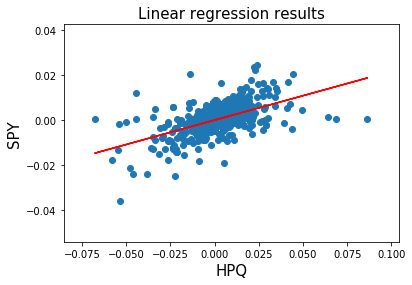

In [11]:
plt.figure(figsize = (6, 4))
plt.scatter(returns[stockLabel], returns["SPY"])
plt.ylabel('SPY', size=15)
plt.xlabel(stockLabel, size=15)
plt.title("Linear regression results", size=15)
plt.plot(returns[stockLabel], model.predict(),'r-')
plt.show()

### Does adding variables increase the $R^2$?

In [12]:
rSquared = []
N = 1
regressionTickers = returns.columns[1]
X = returns[regressionTickers].values
Y = returns["SPY"].values
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
rSquared.append(model.rsquared)

for N in range(2, nbExtract):
    regressionTickers = [returns.columns[i] for i in range(1, N)]
    X = np.column_stack((returns[rt].values for rt in regressionTickers))
    Y = returns["SPY"].values
    X = sm.add_constant(X)
    model = sm.OLS(Y, X).fit()
    rSquared.append(model.rsquared)

C:\Users\Jacka\anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if sys.path[0] == '':


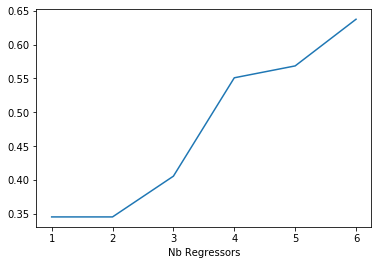

In [13]:
df = pd.DataFrame({ 'Nb Regressors' : range(1,nbExtract),'RSquared' : rSquared})
df = df.set_index('Nb Regressors')
df['RSquared'].plot();

#### Linear Regression with all the factors

In [14]:
N = nbExtract
regressionTickers = [returns.columns[i] for i in range(1, N)]
X = np.column_stack((returns[rt].values for rt in regressionTickers))
Y = returns["SPY"].values
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     150.9
Date:                Thu, 03 Dec 2020   Prob (F-statistic):          2.16e-108
Time:                        17:49:25   Log-Likelihood:                 2073.0
No. Observations:                 502   AIC:                            -4132.
Df Residuals:                     495   BIC:                            -4102.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.438e-05      0.000      0.308      0.7

C:\Users\Jacka\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


### Linear Regression using Scikit Learn

In [15]:
from sklearn.linear_model import LinearRegression
x, y = returns[stockLabel].values, returns["SPY"].values
length = len(returns[stockLabel].values)
x = x.reshape(length, 1)
y = y.reshape(length, 1)
regr = LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

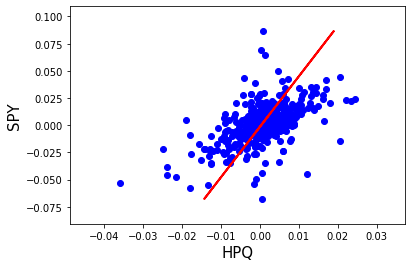

In [16]:
plt.scatter(y, x,  color='blue')
plt.plot(regr.predict(x), x, color='red', linewidth=2)
plt.xlabel(stockLabel, size=15)
plt.ylabel("SPY", size=15)
plt.show()

In [17]:
print("Regression coefficient: ", regr.coef_)
print("Regression intercept: ", regr.intercept_)

Regression coefficient:  [[0.21570802]]
Regression intercept:  [0.00030082]
